In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

On fait des plots sur les runs

In [2]:
from problem.workflow import print

# Data

In [3]:
from problem.mnist import load_data

In [4]:
X, y = load_data()

# Load models

In [5]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from main import get_data_shape

In [6]:
def load_models(get_model, *args, **kwargs):
    models = []
    n_features, n_classes = get_data_shape('mnist')
    for i in range(12):
        model = get_model(*args, n_features=n_features, n_classes=n_classes, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from myNN import get_model as get_model_NN
from myNNDA import get_model as get_model_NNDA
from myTP import get_model as get_model_TP
from myPAN import get_model as get_model_PAN


# Test submission

In [8]:
from problem.mnist import test_submission


In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [10]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=20)


In [12]:
TP_L01_models = load_models(get_model_TP, preprocessing=preprocessing, trade_off=0.1)
df_list = test_submission(TP_L01_models, X, y, z_list=z_list)
TP_L01_mean_acc, TP_L01_std_acc = get_mean_std(df_list)


2017-11-27 13:52:56 testing model 1/12
2017-11-27 13:53:36 testing model 2/12
2017-11-27 13:54:18 testing model 3/12
2017-11-27 13:55:00 testing model 4/12
2017-11-27 13:55:42 testing model 5/12
2017-11-27 13:56:27 testing model 6/12
2017-11-27 13:57:02 testing model 7/12
2017-11-27 13:57:45 testing model 8/12
2017-11-27 13:58:26 testing model 9/12
2017-11-27 13:59:06 testing model 10/12
2017-11-27 13:59:48 testing model 11/12
2017-11-27 14:00:29 testing model 12/12
2017-11-27 14:01:12 Done.


In [13]:
TP_L1_models = load_models(get_model_TP, preprocessing=preprocessing, trade_off=1.0)
df_list = test_submission(TP_L1_models, X, y, z_list=z_list)
TP_L1_mean_acc, TP_L1_std_acc = get_mean_std(df_list)


2017-11-27 14:01:12 testing model 1/12
2017-11-27 14:01:53 testing model 2/12
2017-11-27 14:02:35 testing model 3/12
2017-11-27 14:03:16 testing model 4/12
2017-11-27 14:03:58 testing model 5/12
2017-11-27 14:04:42 testing model 6/12
2017-11-27 14:05:21 testing model 7/12
2017-11-27 14:06:02 testing model 8/12
2017-11-27 14:06:44 testing model 9/12
2017-11-27 14:07:25 testing model 10/12
2017-11-27 14:08:07 testing model 11/12
2017-11-27 14:08:50 testing model 12/12
2017-11-27 14:09:31 Done.


In [14]:
TP_L10_models = load_models(get_model_TP, preprocessing=preprocessing, trade_off=10.0)
df_list = test_submission(TP_L10_models, X, y, z_list=z_list)
TP_L10_mean_acc, TP_L10_std_acc = get_mean_std(df_list)


2017-11-27 14:09:31 testing model 1/12
2017-11-27 14:10:14 testing model 2/12
2017-11-27 14:10:59 testing model 3/12
2017-11-27 14:11:43 testing model 4/12
2017-11-27 14:12:23 testing model 5/12
2017-11-27 14:13:05 testing model 6/12
2017-11-27 14:13:48 testing model 7/12
2017-11-27 14:14:32 testing model 8/12
2017-11-27 14:15:13 testing model 9/12
2017-11-27 14:15:56 testing model 10/12
2017-11-27 14:16:37 testing model 11/12
2017-11-27 14:17:19 testing model 12/12
2017-11-27 14:18:03 Done.


In [15]:
TP_L100_models = load_models(get_model_TP, preprocessing=preprocessing, trade_off=100.0)
df_list = test_submission(TP_L100_models, X, y, z_list=z_list)
TP_L100_mean_acc, TP_L100_std_acc = get_mean_std(df_list)


2017-11-27 14:18:03 testing model 1/12
2017-11-27 14:18:50 testing model 2/12
2017-11-27 14:19:38 testing model 3/12
2017-11-27 14:20:25 testing model 4/12
2017-11-27 14:21:07 testing model 5/12
2017-11-27 14:21:51 testing model 6/12
2017-11-27 14:22:32 testing model 7/12
2017-11-27 14:23:18 testing model 8/12
2017-11-27 14:23:58 testing model 9/12
2017-11-27 14:24:44 testing model 10/12
2017-11-27 14:25:28 testing model 11/12
2017-11-27 14:26:13 testing model 12/12
2017-11-27 14:26:58 Done.


# Plot


- What about confusion matrices ???


In [16]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

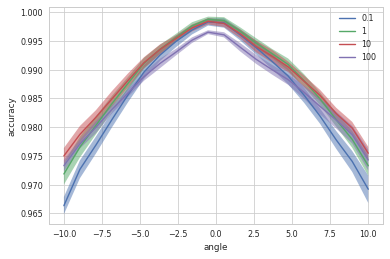

In [17]:
z = z_list

# plt.figure(figsize=(20,10))

plt.plot(z, TP_L01_mean_acc, label='0.1')
plt.fill_between(z, TP_L01_mean_acc+TP_L01_std_acc, TP_L01_mean_acc-TP_L01_std_acc, alpha=0.5)

plt.plot(z, TP_L1_mean_acc, label='1')
plt.fill_between(z, TP_L1_mean_acc+TP_L1_std_acc, TP_L1_mean_acc-TP_L1_std_acc, alpha=0.5)

plt.plot(z, TP_L10_mean_acc, label='10')
plt.fill_between(z, TP_L10_mean_acc+TP_L10_std_acc, TP_L10_mean_acc-TP_L10_std_acc, alpha=0.5)

plt.plot(z, TP_L100_mean_acc, label='100')
plt.fill_between(z, TP_L100_mean_acc+TP_L100_std_acc, TP_L100_mean_acc-TP_L100_std_acc, alpha=0.5)


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


# Playground

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
# from myNNDA import data_augment

In [ ]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()